<h3>ML Linear regression exercise: Alpha and Beta Model</h3>



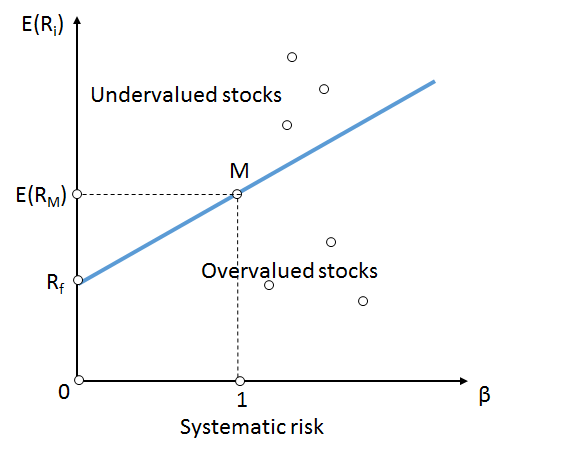



The Alpha and Beta of a particular model can be defined as below:
$$\DeclareMathOperator*{\E}{\mathbb{E}}E[r_{a}]-r_{f}=\alpha+\beta(E[r_{m}-r_{f}])+\epsilon$$


With $r_{a}$ being the return on the asset, $r_{f}$ the risk free rate and $r_{m}$ the return of the market (S&P500 in the case of the US; it has a beta $\beta$ of 1 by definition)

We want a model to represent the security market line, and to give the alpha of a certain asset knowing its return, the R.F.R. and the risk of the market (S&P500 $\beta$=1).  
We also want this line to predict the risk free rate during this period.

The period we are chosing for our data is the year 2022, where most assets have had a significant negative return (S&P500 down 20%)





<i>Data from Bloomberg</i>


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [10]:
a = pd.read_excel("testv.xlsx")
a

,Ticker,Name,Beta:M-6,1Y Tot Ret
0,SPX,SnP500,1.0000,-19.4800
1,NVDA US Equity,NVIDIA CORP,1.7477,-20.6318
2,AMD US Equity,ADVANCED MICRO DEVICES,1.6225,-35.6482
3,BX US Equity,BLACKSTONE INC,1.5181,-25.5601
4,INTU US Equity,INTUIT INC,1.3807,-24.1098
...,...,...,...,...
87,MCD US Equity,MCDONALD'S CORP,0.6267,5.5623
88,ELV US Equity,ELEVANCE HEALTH INC,0.6182,15.1133
89,JNJ US Equity,JOHNSON & JOHNSON,0.5719,-1.8596
90,MRK US Equity,MERCK & CO. INC.,0.5327,35.2970


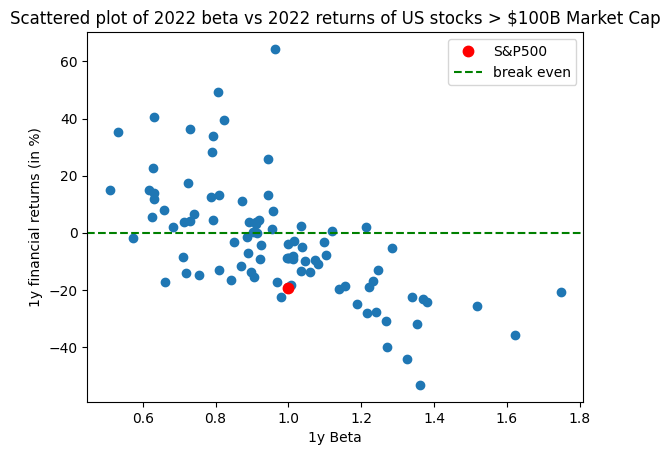

In [39]:
plt.scatter(a["Beta:M-6"], a["1Y Tot Ret"])
plt.plot(a["Beta:M-6"][0], a["1Y Tot Ret"][0], marker='.', ls='none', ms=15, label="S&P500", color="r")
plt.axhline(0,linestyle="--",color="g",label="break even")
plt.legend()
plt.xlabel("1y Beta")
plt.ylabel("1y financial returns (in %)")
plt.title("Scattered plot of 2022 beta vs 2022 returns of US stocks > $100B Market Cap")
plt.show()

This Chart looks fairly different from the theory of the security market line, but in general, the higher the Beta the lower the financial returns were.
It is coherent with theory.

In [69]:
# linear regression through gradian descent

X = a["Beta:M-6"]
Y = a["1Y Tot Ret"]
m, c = 0, 0
L_rate = 0.001
number_of_iteration = 100000
n = float(len(X)) # number of values 

for i in range(number_of_iteration):
    Y_pred = m*X+c
    d_m = (-2/n) * sum(X*(Y-Y_pred))
    d_c = (-2/n) * sum(Y-Y_pred)
    m = m - L_rate*d_m
    c = c - L_rate*d_c
    
print(f"The calculated function is: y = {m}*x + {c}")

The calculated function is: y = -53.13081143208599*x + 47.76702189598113


This model predicts that the 2022 market return (I.E. S&P) was: -5.36% 



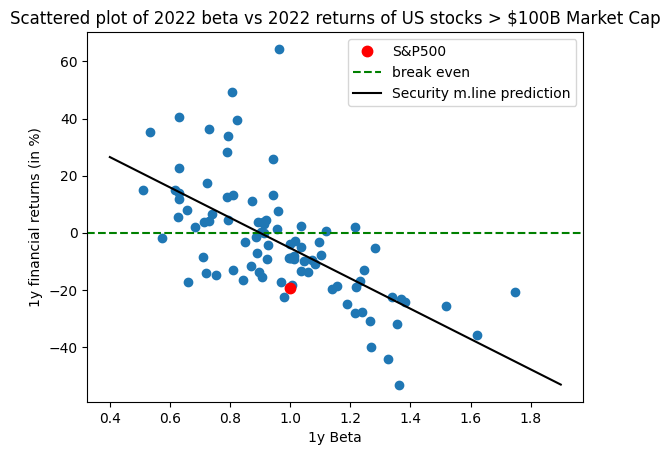

In [81]:
x = np.linspace(0.4, 1.9, 1000)

print(f"This model predicts that the 2022 market return (I.E. S&P) was: {round(m+c, 2)}% \n")

plt.scatter(a["Beta:M-6"], a["1Y Tot Ret"])
plt.plot(a["Beta:M-6"][0], a["1Y Tot Ret"][0], marker='.', ls='none', ms=15, label="S&P500", color="r")
plt.axhline(0,linestyle="--",color="g",label="break even")
plt.plot(x, m*x+c, color="0",label="Security m.line prediction", linestyle="-")
plt.legend()
plt.xlabel("1y Beta")
plt.ylabel("1y financial returns (in %)")
plt.title("Scattered plot of 2022 beta vs 2022 returns of US stocks > $100B Market Cap")
plt.show()

The plot above alows us to calculate the $\alpha$ of stocks. The risk free rate $r_{f}$ changed a lot during 2022, so we will take its average such as:
$r_{f}=1.98$


Our model is obviously not perfect, since it predicts $\hat{r_{f}}=47.76$ 

<h4><u>Alpha Calculation</u></h4>


We are going to calculate the alpha of securities according to the theory of the security market line and according to our model:
The formula is:

$$\alpha = r - r_{f} - \beta(r_{m}+r_{f}) $$

Where, $r$ is the return of the asset and $r_{m}$ the market return  


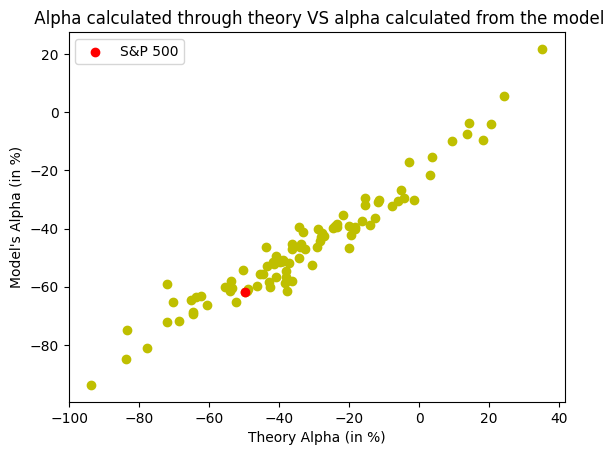

In [ ]:
r = 2


# This model's alpha calculation 
a["Model Alpha"] = a["1Y Tot Ret"] - c - a["Beta:M-6"]*(m+c)

# Alpha in theory 
a["Theory Alpha"] = a["1Y Tot Ret"] - r - a["Beta:M-6"]*(a["1Y Tot Ret"][0]+c)

plt.title(" Alpha calculated through theory VS alpha calculated from the model")
plt.scatter(a["Theory Alpha"], a["Model Alpha"], color="y")
plt.scatter(a["Theory Alpha"][0], a["Model Alpha"][0], color="r", label="S&P 500")
plt.legend()
plt.xlabel("Theory Alpha (in %)")
plt.ylabel("Model's Alpha (in %)")
plt.show()